# Ice-albedo feedback and Snowball Earth

Welcome!  In this activity we will apply our simple energy balance model ("EBM") in Climlab to evaluate the climate impacts of changing ice cover.  

We will study one of the most extreme cases of the ice-albedo feedback hinted at in the geologic record: Snowball Earth.

![Snowball Earth artist's conception](./figs/snowball-large-Science.jpg)

In [1]:
#  Ensure compatibility with Python 2 and 3
from __future__ import print_function, division

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import climlab

In [3]:
def state_plot(model, figsize=(12,5), show=True, ice_temp=True): ## define a standard plot for temperature and albedo
    """Plot the temperature and albedo at the current state of the model.
    Shade the current ice line in grey."""
    templimits = -30,35
    alimits = min(model.albedo)-0.05, max(model.albedo)+0.05
    latlimits = -90,90
    lat_ticks = np.arange(-90,90,30)
    
    Ts = np.array(model.Ts).flatten()
    if ice_temp:
    	Tf = float(model.param['Tf'])
    else:
    	Tf=0
    
    fig = plt.figure(figsize=figsize)
    
    ax1 = fig.add_subplot(1,2,1)
    ax1.plot(model.lat, Ts)
    ax1.set(xlim=latlimits, ylim=templimits,
           ylabel='Temperature [deg C]', xlabel='Latitude', xticks=lat_ticks)
    ax1.fill_between(model.lat, Ts, y2=Tf, where=Ts<Tf, color='LightGrey', alpha=0.5)
    ax1.grid()
    
    ax2 = fig.add_subplot(1,2,2)
    icerect1 = patches.Rectangle((latlimits[0], 0), width=model.icelat[0]-latlimits[0], height=1,
                            color='LightGrey', alpha=0.5)
    icerect2 = patches.Rectangle((model.icelat[1], 0), width=latlimits[1]-model.icelat[1], height=1,
                            color='LightGrey', alpha=0.5)
    ax2.add_patch(icerect1)
    ax2.add_patch(icerect2)
    ax2.plot(model.lat, model.albedo)
    ax2.set(xlim=latlimits, ylim=alimits,
           ylabel='Albedo', xlabel='Latitude', xticks=lat_ticks)
    ax2.grid()

## Contents

1. [Setting up an energy balance model](#section1)
2. [Ice advance and retreat in the EBM](#section2)
3. [Snowball Earth: onset](#section3)
4. [Escape from the Snowball](#section4)

We will use an energy balance model that is very similar to what we set up in Lab 3, with one exception: we account for variations in energy with latitude, and energy transport across latitude bands.

____________
<a id='section1'></a>

## 1. Setting up an energy balance model
____________


![Simplified energy balance](./figs/radbalance-abbott.jpeg)

As we have seen in lecture, Earth's energy budget is an important control on the climate we experience.  Radiation energy coming in from the sun can be reflected (in the atmosphere or from the surface) or absorbed.  The portion of incoming solar radiation $Q$ that is reflected, $Q_{reflected}$, is set by the **planetary albedo**, $\alpha$.

As we saw in lecture, 

In [4]:
Q = 341.3 # W/m2, the incoming solar radiation
Q_reflected = 101.9 # W/m2, the reflected shortwave radiation
alpha = Q_reflected/Q

print('The planetary albedo is {:.2f}'.format(alpha)) # make a nicely formatted print statement to 2 sig figs

The planetary albedo is 0.30


The portion of incoming solar radiation that is not reflected is the **Absorbed Shortwave Radiation**, 
\begin{equation}
ASR=Q-Q_{reflected}=Q (1-\alpha),
\end{equation}  
controlled by the albedo $\alpha$.

The heat energy emitted to space at the top of the atmosphere is the **Outgoing Longwave Radiation**, $OLR$.  The total **energy budget** of the Earth system is the balance between energy going out ($OLR$) and coming in ($ASR$):

\begin{align}
\frac{dE}{dt} &= ASR - OLR \\
    &= Q (1-\alpha) - OLR,
\end{align}
where we see $\alpha$ is a key parameter.

This is the basis of the simple **energy balance model** we first set up in Climlab.  Today, we will use it to explore the ice-albedo feedback.

### Our EBM: latitude-dependent, annual mean

Here, we'll use an energy balance model that accounts for radiation fluxes that vary with latitude $\phi$, but averages out seasonal changes in an annual mean.

The equation the model will solve for us is below.  
\begin{align*}
C(\phi) \frac{\partial T_s}{\partial t} = & ~(1-\alpha) ~ Q - \left( A + B~T_s \right) +  \\
& \frac{D}{\cos⁡\phi } \frac{\partial }{\partial \phi} \left(\cos⁡\phi  ~ \frac{\partial T_s}{\partial \phi} \right)
\end{align*}

**Questions:**

*1.1. With your lab partner, diagram the physical meaning of each term in the equation.*

*1.2. How do you expect the heat capacity, $C(\phi)$, to vary with latitude?  Why?*

1.1
* $\phi$ = latitude
* $\alpha$ = albedo
* $\frac{\partial T_s}{\partial t}$ = Change in surface temperature over time
* $\frac{\partial T_s}{\partial \phi}$ = Change in latitude
* Q = incoming solar radiation
* A = 210 W m^-2 emission at 0ºC
* B = 2 W m^-2 increase in emission per degree, related to net longwave climate feedback
* D = 0.6 W m^-2 thermal diffusivity of the climate system
1.2
We expect $C($\phi\$) to be higher in areas with a lot of water such as the equator.

____________
<a id='section2'></a>

## 2. Interactive snow and ice line in the EBM
____________


### Temperature-dependent ice line

Let the surface albedo be larger wherever the temperature is below some threshold $T_f$:

$$ \alpha\left(\phi, T(\phi) \right) = \left\{\begin{array}{ccc} 
\alpha_0 + \alpha_2 P_2(\sin\phi) & ~ & T(\phi) > T_f \\
a_i & ~ & T(\phi) \le T_f \\
\end{array} \right. $$


In [5]:
#  for convenience, set up a dictionary with our reference parameters
param = {'A':210, 'B':2, 'a0':0.3, 'a2':0.078, 'ai':0.62, 'Tf':-10.}
model1 = climlab.EBM_annual(name='Annual EBM with ice line', 
                            num_lat=180, D=0.55, **param )
print(model1)

climlab Process of type <class 'climlab.model.ebm.EBM_annual'>. 
State variables and domain shapes: 
  Ts: (180, 1) 
The subprocess tree: 
Annual EBM with ice line: <class 'climlab.model.ebm.EBM_annual'>
   LW: <class 'climlab.radiation.aplusbt.AplusBT'>
   insolation: <class 'climlab.radiation.insolation.AnnualMeanInsolation'>
   albedo: <class 'climlab.surface.albedo.StepFunctionAlbedo'>
      iceline: <class 'climlab.surface.albedo.Iceline'>
      warm_albedo: <class 'climlab.surface.albedo.P2Albedo'>
      cold_albedo: <class 'climlab.surface.albedo.ConstantAlbedo'>
   SW: <class 'climlab.radiation.absorbed_shorwave.SimpleAbsorbedShortwave'>
   diffusion: <class 'climlab.dynamics.meridional_heat_diffusion.MeridionalHeatDiffusion'>



Because we provided a parameter `ai` for the icy albedo, our model now contains several sub-processes contained within the process called `albedo`. Together these implement the step-function formula above.

The process called `iceline` simply looks for grid cells with temperature below $T_f$ and adjusts their albedo.

In [6]:
print(model1.param)

{'timestep': 350632.51200000005, 'S0': 1365.2, 's2': -0.48, 'A': 210, 'B': 2, 'D': 0.55, 'Tf': -10.0, 'water_depth': 10.0, 'a0': 0.3, 'a2': 0.078, 'ai': 0.62}


In [7]:
model1.integrate_years(5)

Integrating for 450 steps, 1826.2110000000002 days, or 5 years.
Total elapsed time is 5.000000000000044 years.


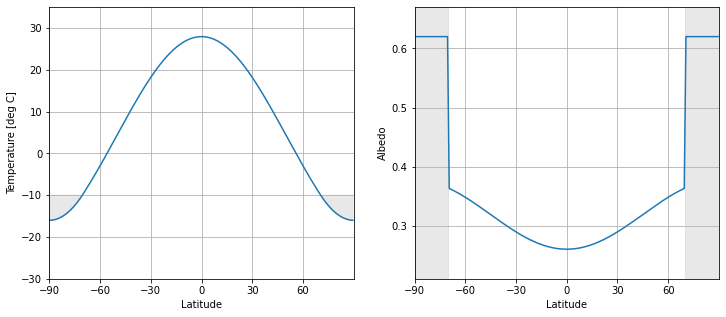

In [8]:
f = state_plot(model1)

Grey shading on the above plots indicates where there is ice in the model.  We can find the same information by querying the model `icelat` attribute:

In [9]:
model1.icelat

array([-70.,  70.])

### Sudden cooling

What happens if we force the model to be colder? Let's store our current model state, then make a new model like it that will decrease the temperature by 20 $^{\circ}$C everywhere. 

**Exercise: figure out how to make a model clone and decrease the temperature by 20 $^{\circ}$C everywhere.**  Call it m2 so that the plotting cell will recognize it.

In [10]:
## Assign current model diagnostics to separate variables
Tequil = np.array(model1.Ts)
ALBequil = np.array(model1.albedo)
OLRequil = np.array(model1.OLR)
ASRequil = np.array(model1.ASR)

In [11]:
m2 = ... #your work here

In [12]:
m2.compute_diagnostics()
f3 = state_plot(m2)

AttributeError: 'ellipsis' object has no attribute 'compute_diagnostics'

In [ ]:
f2 = state_plot(model1)

**Question:**

*2.1. Compare and contrast the global patterns of temperature and albedo in this new, colder climate versus the previous simulation.*

Let's look at the radiative effect - how does the absorbed shortwave radiation change with this colder climate?

AttributeError: 'ellipsis' object has no attribute 'state'

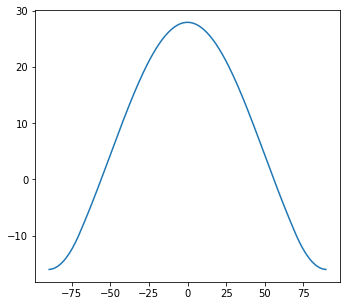

In [13]:
my_ticks = [-90,-60,-30,0,30,60,90]
lat = model1.lat

fig = plt.figure( figsize=(12,5) )

ax1 = fig.add_subplot(1,2,1)
ax1.plot(lat, Tequil, label='equil') 
ax1.plot(lat, m2.state['Ts'], label='pert' )
ax1.grid()
ax1.legend()
ax1.set_xlim(-90,90)
ax1.set_xticks(my_ticks)
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Temperature (degC)')

ax2 = fig.add_subplot(1,2,2)
ax2.plot( lat, ASRequil, label='equil') 
ax2.plot( lat, m2.diagnostics['ASR'], label='pert' )
ax2.grid()
ax2.legend()
ax2.set_xlim(-90,90)
ax2.set_xticks(my_ticks)
ax2.set_xlabel('Latitude')
ax2.set_ylabel('ASR (W m$^{-2}$)')

This tells us that making the climate colder, and allowing the ice edge to advance, tends to decrease the absorbed shortwave radiation (ASR).  That is, ice advance due to cooling is a ***positive feedback*** that will tend to lead to more cooling and more ice advance. 

**Question:**
*2.2. Repeat the comparison with a warmer climate.  What is responsible for the differences?*

____________
<a id='section3'></a>

## 3. Snowball Earth onset
____________


In section 2 we forced the model to be cooler everywhere.  Now, we'll examine some real conditions of the past that could have forced a cooling.

The radiation coming in from the sun has not always been what it was today.  Millions of years ago, the Sun was less bright, and as a result there was less solar energy entering the Earth system.  Luckily, it is easy to use our ClimLab energy balance model to investigate a past climate with a weaker sun.

The model parameter `S0` is the solar constant, describing the flux of solar radiation.

In [ ]:
m3 = climlab.process_like(model1)

In [ ]:
m3.subprocess.insolation.S0

In [ ]:
m3.icelat

Let's decrease the solar constant to examine past conditions.

In [ ]:
m3.subprocess.insolation.S0 = 1300.
m3.integrate_years(100.)
m3.icelat

In [ ]:
f3 = state_plot(m3)

*3.1. Find a value or values of S0 that results in 100% ice cover (entire plot shaded).*

*3.2. Compare the value of S0 that you found with the inferred history of S0 (from the textbook or another source). Was it possible to reach Snowball Earth conditions under realistic historical values of S0?*

Is it possible to produce Snowball Earth with orbital parameters only?  Climlab can help us assess.  Modify the eccentricity, longitude of perihelion, and obliquity below to see if you can produce a Snowball Earth with realistic values.

In [ ]:
## alternative: orbital forcing
m3.subprocess.insolation.orb = {'ecc': 0.017236, 'long_peri': 281.37, 'obliquity': 22.9}
m3.integrate_years(100.)
m3.icelat

*What do you conclude from this experiment?*

____________
<a id='section4'></a>

## 4. Escape from the Snowball
____________


We have read that there were other important factors in Earth's past climate.  

**Discussion:**
With your neighbor and then in class, propose a geological mechanism that could have ended Snowball Earth.

____________

## Credits

This notebook was developed by [Lizz Ultee](http://ehultee.github.io), based in large part on the `ClimateModeling_courseware` resources of author of [Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html).
____________